In [11]:
import random
import json
import pandas as pd
from tqdm import tqdm
from model import Model
import pickle
import matplotlib.pyplot as plt

In [3]:
filename = "diverse_count.json"

In [7]:
model_names = ["Llama-2-7b-hf", "Mistral-7B-Instruct-v0.2", "Meta-Llama-3-8B-Instruct"]

In [8]:
output_data = {}
for file_path in model_names:
    with open("logs/10k_results/" + file_path + "_10000.pkl", 'rb') as file:
            output_data[file_path] = pickle.load(file)

In [13]:
from model import Model

In [9]:
final = {}
for model_name in model_names:
    m = Model("meta-llama/Meta-Llama-3-8B-Instruct", filename)
    accuracy = m.calc_res(output_data[model_name], num=10000)
    final[model_name] = accuracy

`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]
/home/malik.ana/cbai/model.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abridged['output'] = output
/home/malik.ana/cbai/model.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abridged['result'] = df_abridged.apply(lambda row: row['answer'] == row['output'], axis=1)
Loading checkpoint shards: 100%|██████████| 4/4 [00:09<00:00,  2.35s/it]
/home/malik.ana/cbai/model.py:6

In [21]:
print(f"{'Model':<20} | {'Accuracy':>10}")
print("-" * 33)

for f in model_names:
    print()
    print(f"{f:<20} | {final[f]:>10.4f}")

Model                |   Accuracy
---------------------------------

Llama-2-7b-hf        |     0.1089

Mistral-7B-Instruct-v0.2 |     0.2716

Meta-Llama-3-8B-Instruct |     0.5062


(0.0, 1.0)

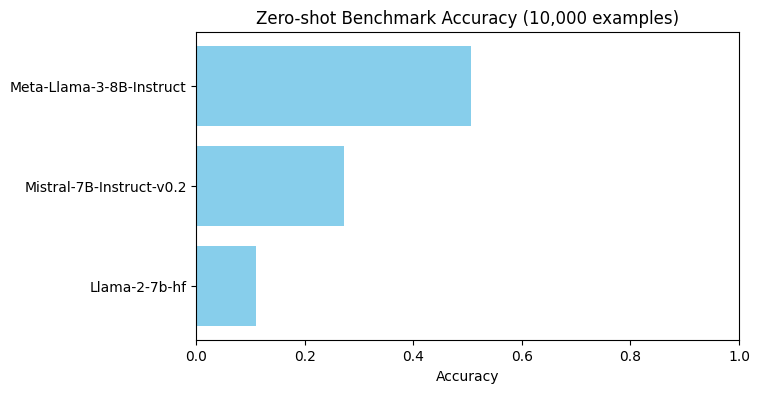

In [13]:
plt.figure(figsize=(7, 4))
plt.barh(final.keys(), final.values(), color="skyblue")
plt.xlabel("Accuracy")
plt.title("Zero-shot Benchmark Accuracy (10,000 examples)")
plt.xlim(0, 1)
